In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
# Generate sample data with one variable 
np.random.seed(42)
X = np.linspace(0, 10 , 100).reshape(-1, 1)
y = 2.5 * X.ravel() + 5 + np.random.normal(0, 2, 100)

In [18]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42
)

In [20]:
# Standardize features (import reqularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
coefficient = model.coef_[0]
intercept   = model.intercept_

# Evaluation metrics
r2_score_train = model.score(X_train_scaled, y_train)
r2_score_test = model.score(X_test_scaled, y_test)

print(f"Coefficient: {coefficient:.4f}\n")
print(f"Intercept:   {intercept:.4f}\n")
print(f"Training R2 score: {r2_score_train:.4f}\n")
print(f"Testing R2 score:  {r2_score_test:.4f}\n")

Coefficient: 7.3606

Intercept:   17.5791

Training R2 score: 0.9401

Testing R2 score:  0.9553



- ---------------------------------------------------------------------------------

### Ridge Regression (L2 Regularization)

In [28]:
# alpha is the reqularization strength
ridge = Ridge(alpha = 1.0) 
ridge.fit(X_train_scaled, y_train)

Ridge()

In [30]:
ridge_coefficient = ridge.coef_[0]
ridge_intercept = ridge.intercept_

r2_train_ridge = ridge.score(X_train_scaled, y_train)
r2_test_ridge = ridge.score(X_test_scaled, y_test)

print(f"Coefficient: {ridge_coefficient:.4f}\n")
print(f"Intercept:   {ridge_intercept:.4f}\n")
print(f"Training R2 score: {r2_train_ridge:.4f}\n")
print(f"Testing R2 score:  {r2_test_ridge:.4f}\n")

Coefficient: 7.2697

Intercept:   17.5791

Training R2 score: 0.9399

Testing R2 score:  0.9550



### What does Ridge Regression do:
- Minimizes ===> Sum of Squared Erros + alpha x (sum of squared coefficients)
  
- Formula: Loss =  Σ(y - ŷ)² + α × Σ(coefficient²)

- Effect: `SHINKS coefficients towards zero` (but never exactly zero)

- alpha : Controls regularization strength
      - higher = more shrinkage

### When to use Ridge:
- When you have `MULTICOLLINEARITY` (correlated features)

- When you want to keep all features but reduce their impact

- When you have more features than observations

- When you want to prevent overfitting without feature selection

- ---------------------------------------------------------------------------------

### Lasso Regression (L1 Regularization)

In [29]:
# Usually needs smaller alpha than Ridge
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [31]:
lasso_coefficient = lasso.coef_[0]
lasso_intercept = lasso.intercept_

r2_train_lasso = lasso.score(X_train_scaled, y_train)
r2_test_lasso = lasso.score(X_test_scaled, y_test)

print(f"Coefficient: {lasso_coefficient:.4f}\n")
print(f"Intercept:   {lasso_intercept:.4f}\n")
print(f"Training R2 score: {r2_train_lasso:.4f}\n")
print(f"Testing R2 score:  {r2_test_lasso:.4f}\n")

Coefficient: 7.2606

Intercept:   17.5791

Training R2 score: 0.9399

Testing R2 score:  0.9550



### What does Lasso Regression do:
- Minimizes ==> Sum of Squared Erros + alpha x (sum of absolute coefficients)

- Formula: Loss = Σ(y - ŷ)² + α × Σ|coefficient|

- Effect: Can `FORCE` coefficients to `EXACTLY ZERO`(feature selection)

- alpha controls regularization strength


### When to use Lasso:
- When you want `AUTOMATIC FEATURE SELECTION`

- When you select only a few features are truly important

- When you want a SPARSE model (many coefficients = 0)

- When interpretability matters (fewer features to explain)


- ---------------------------------------------------------------------------------

### Elastic Net (Combines L1 + L2)

In [36]:
# l1_ration: 0 = Ridge, 1 = Lasso, 0.5 = equal mix
elastic = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.1)

In [38]:
elastic_coefficient = elastic.coef_[0]
elastic_intercept = elastic.intercept_

r2_train_elastic = elastic.score(X_train_scaled, y_train)
r2_test_elastic = elastic.score(X_test_scaled, y_test)

print(f"Coefficient: {elastic_coefficient:.4f}\n")
print(f"Intercept:   {elastic_intercept:.4f}\n")
print(f"Training R2 score: {r2_train_elastic:.4f}\n")
print(f"Testing R2 score:  {r2_test_elastic:.4f}\n")

Coefficient: 6.9625

Intercept:   17.5791

Training R2 score: 0.9373

Testing R2 score:  0.9518



### What does Elastic-Net Regression do:
- Minimizes ==> Sum of Squared Errors + alpha x [l1_ratio×Σ|coef| + (1-l1_ratio)×Σ(coef²)]

- Combines Ridge and Lasso penalties

- l1_ratio = 0 --> Pure Ridge

- l1_ratio = 1 --> Pure Lasso

- l1_ratio = 0.5 --> Equal Mix


### When to use Elastic Net:
- When features are HIGHLY COLLERATED (lasso alone is unstable)

- When you want feature selection BUT Ridge-like stability

- When you have GROUPED FEATURES that should be selected together

- Best for both worlds: feature selection + handles correlation 

- ---------------------------------------------------------------------------------

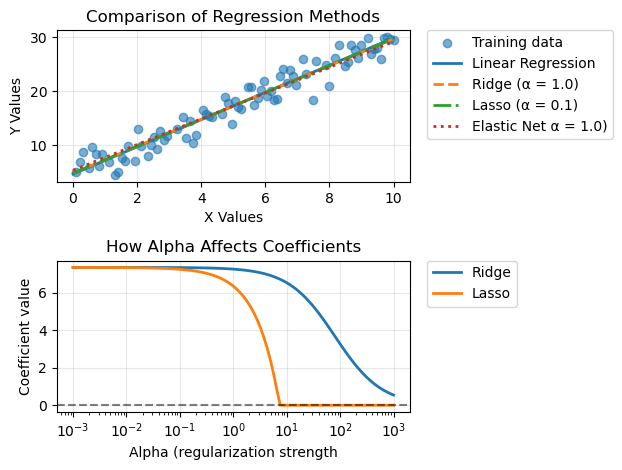

In [104]:
# Create prediction for plotting 
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_scaled = scaler.transform(X_plot)

plt.figure(figure=(20, 10))

# Plot 1. Comparing all model 
plt.subplot(2, 1, 1)
plt.scatter(X_train, y_train, alpha = 0.6, label = "Training data")
plt.plot(X_plot, model.predict(X_plot_scaled), label = "Linear Regression", linewidth = 2)          
plt.plot(X_plot, ridge.predict(X_plot_scaled), label = "Ridge (α = 1.0)", linewidth = 2, linestyle = "--")
plt.plot(X_plot, lasso.predict(X_plot_scaled), label = "Lasso (α = 0.1)", linewidth = 2, linestyle = "-.")
plt.plot(X_plot, elastic.predict(X_plot_scaled), label = "Elastic Net α = 1.0)", linewidth = 2, linestyle = ":")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Comparison of Regression Methods")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True, alpha = 0.3)






# Plot 2. Effect of alpha on coefficients

# creates an array of 100 numbers evenly spaced on a logarithmic scale between 10^(-3) and 10^3
alphas = np.logspace(-3, 3, 100)
ridge_coefs = []
lasso_coefs = []

for alpha in alphas:
    ridge_temp = Ridge(alpha = alpha)
    ridge_temp.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge_temp.coef_[0])

    lasso_temp = Lasso(alpha = alpha)
    lasso_temp.fit(X_train_scaled, y_train)
    lasso_coefs.append(lasso_temp.coef_[0])

plt.subplot(2, 1, 2)
plt.plot(alphas, ridge_coefs, label = "Ridge", linewidth = 2)
plt.plot(alphas, lasso_coefs, label = "Lasso", linewidth = 2)
plt.axhline( y = 0, color = "k", linestyle = "--", alpha = 0.5)
plt.xscale("log")
plt.xlabel("Alpha (regularization strength")
plt.ylabel("Coefficient value")
plt.title("How Alpha Affects Coefficients")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(True, alpha  = 0.3)

plt.tight_layout()

#### few features, no correlation ==> Regular Linear Regression
#### Many correlated features     ==> Ridge Regression
#### Want to eliminate features   ==> Lasso Regression
#### Both of above situations     ==> Elastic Net
#### Unsure what to use           ==> Start with Elastic Net (safe bet)

### Key Difference:
- Ridge: Shrinks coefficient but KEEPS all features

- Lasso: Can SET coefficients to ZERO (removes features)

- Elastic Net: Does BOTH (most flexible)


 ##### Always STANDARDIZE your features before using reqularization!

 ##### Higher alpha = stronger regularization = simpler model

 ##### Use cross-validation to find the best alpha value